In [43]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Import data
diabetes_filepath = 'diabetes.csv'
doctors_filepath = 'doctors.csv'

diabetes = pd.read_csv(diabetes_filepath)
doctors = pd.read_csv(doctors_filepath, encoding = 'ISO-8859-1')

# Join data: Using Patient_ID
data = pd.merge(diabetes, doctors, on = 'PatientID')
# sns.pairplot(data)
# plt.show()

/Users/weenit/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


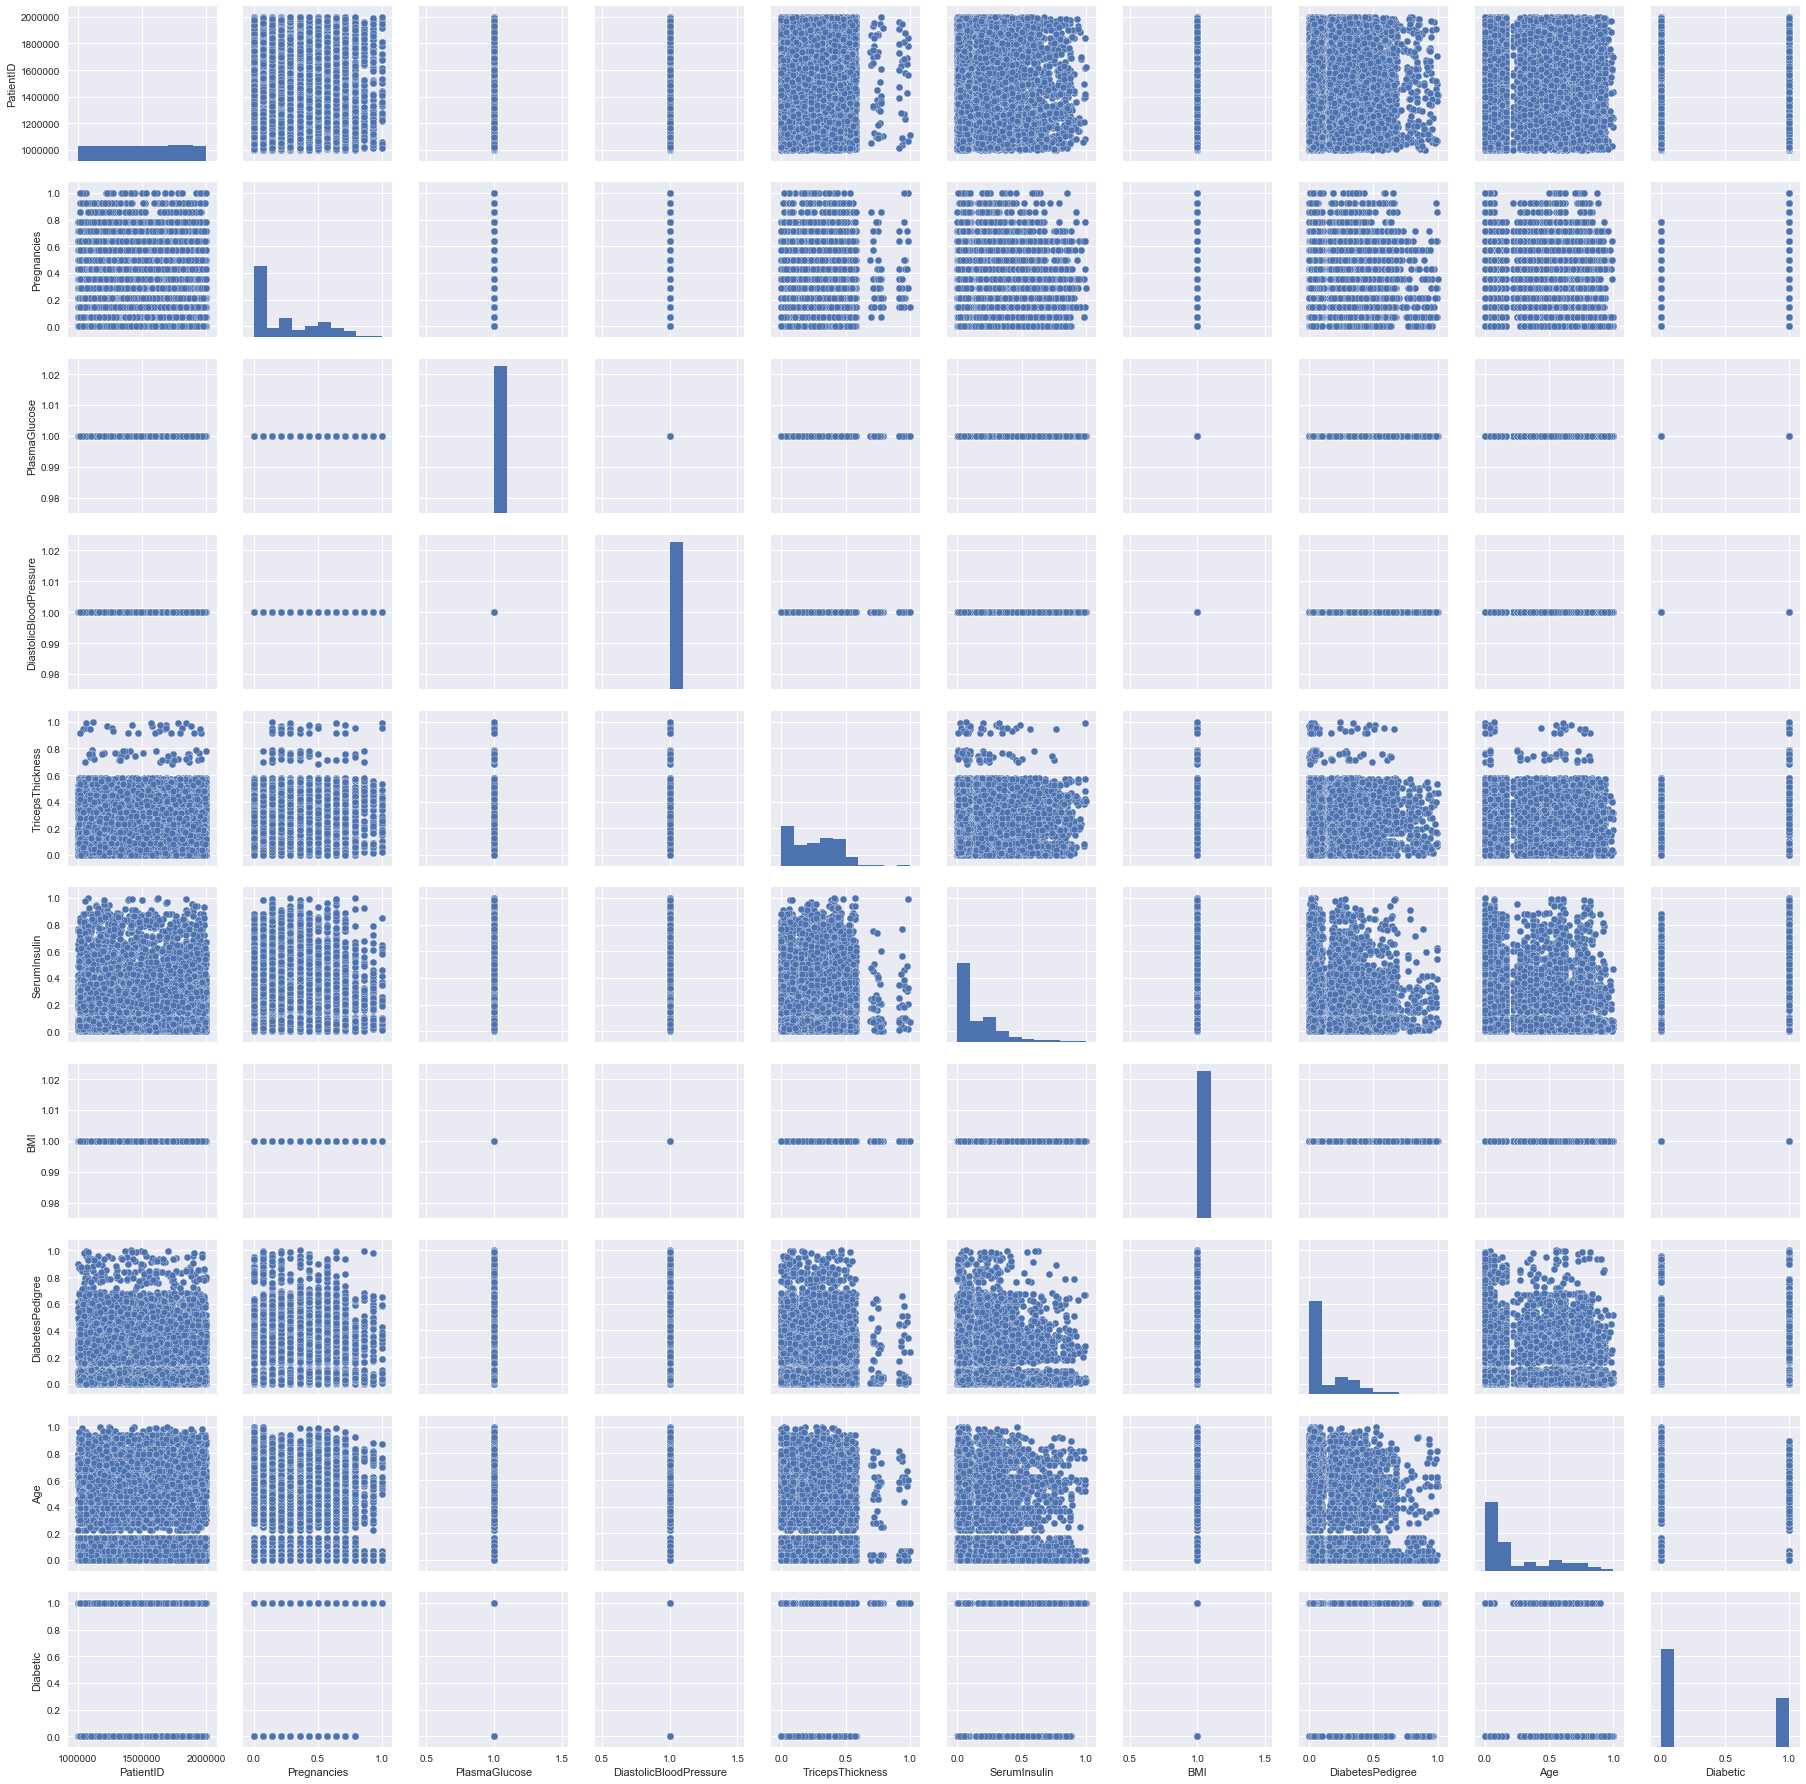

In [44]:
# Math Operation: for age (log of age)
data['Age'] = np.log(data['Age'])

# Normalize Data using zscore
zscore_scaler = preprocessing.Normalizer()
data['PlasmaGlucose'] = zscore_scaler.fit_transform(data[['PlasmaGlucose']])
data['DiastolicBloodPressure'] = zscore_scaler.fit_transform(data[['DiastolicBloodPressure']])
data['BMI'] = zscore_scaler.fit_transform(data[['BMI']])

# Normalize Data using min max
minmax_scaler = preprocessing.MinMaxScaler()
data['Pregnancies'] = minmax_scaler.fit_transform(data[['Pregnancies']])
data['TricepsThickness'] = minmax_scaler.fit_transform(data[['TricepsThickness']])
data['SerumInsulin'] = minmax_scaler.fit_transform(data[['SerumInsulin']])
data['DiabetesPedigree'] = minmax_scaler.fit_transform(data[['DiabetesPedigree']])
data['Age'] = minmax_scaler.fit_transform(data[['Age']])

# sns.pairplot(data)
# plt.show()

In [45]:
# Edit metadata for training
features = pd.DataFrame(data)

del features['PatientID']
del features['Physician']
y = features['Diabetic']
del features['Diabetic']

# Split the data 70-30
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3)

In [56]:

# Two-Class Boosted Decision Tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

# Train Model
bdt.fit(X_train, y_train)

# Predict
predictions = bdt.predict(X_test)
print(predictions[5:20])
print(y_test[5:20])

# Score Model
print ('Score:', bdt.score(X_test, y_test))

# Evaluate Model

[0 1 0 1 0 1 0 0 1 0 0 0 0 0 0]
9666     0
10881    1
7349     0
13347    0
1580     1
5922     1
14945    0
14174    0
13762    1
14664    1
14250    0
13331    0
6153     0
4586     0
7600     0
Name: Diabetic, dtype: int64
Score: 0.92
